In [1]:
%run supportvectors-common.ipynb

#  Old faithful geyser: k-Means Clustering





In a prior notebook, `old-faithful-geyser.ipynb`, we explored *old faithful geyser* data, and found that a linear regression model works quite effectively in modeling the eruptions.

In this exercise, we will find clusters in this dataset.

## Load and explore the data

Let us load the data from the specified url, into a Pandas dataframe. Looking at the github site mentioned above, we see that the dataset is stored as a CSV file, and can be accessed at the url:
https://raw.githubusercontent.com/supportvectors/ml-100/master/old-faithful-geyser.csv

Let us, therefore, load it, and perform some basic explorations. *Note: this data file has the columns as tab-separated.*

In [2]:
source = 'https://raw.githubusercontent.com/supportvectors/ml-100/master/old-faithful-geyser.csv'
raw_data = pd.read_csv(source, sep='\t')
scaler = StandardScaler()
scaled = scaler.fit_transform(raw_data)
data = pd.DataFrame(data={'eruptions':scaled[:, 0], 'waiting': scaled[:,1]})
data.describe(include="all").transpose().style.set_table_styles(sv_table_styles())

,count,mean,std,min,25%,50%,75%,max
eruptions,272.000000,0.000000,1.001843,-1.657009,-1.163053,0.449601,0.848320,1.415130
waiting,272.000000,0.000000,1.001843,-2.055795,-0.950412,0.376047,0.818200,1.849891


**Sample rows**

## Data Visualization

To whet our recollection of the key data exploration findings, let us mention some of the plots of the dataset.

Let us first visualize a scatter plot of the data and look at the histogram of the features. Finally, let us pull of this together with a kernel density plot, into a single plot with subplots.

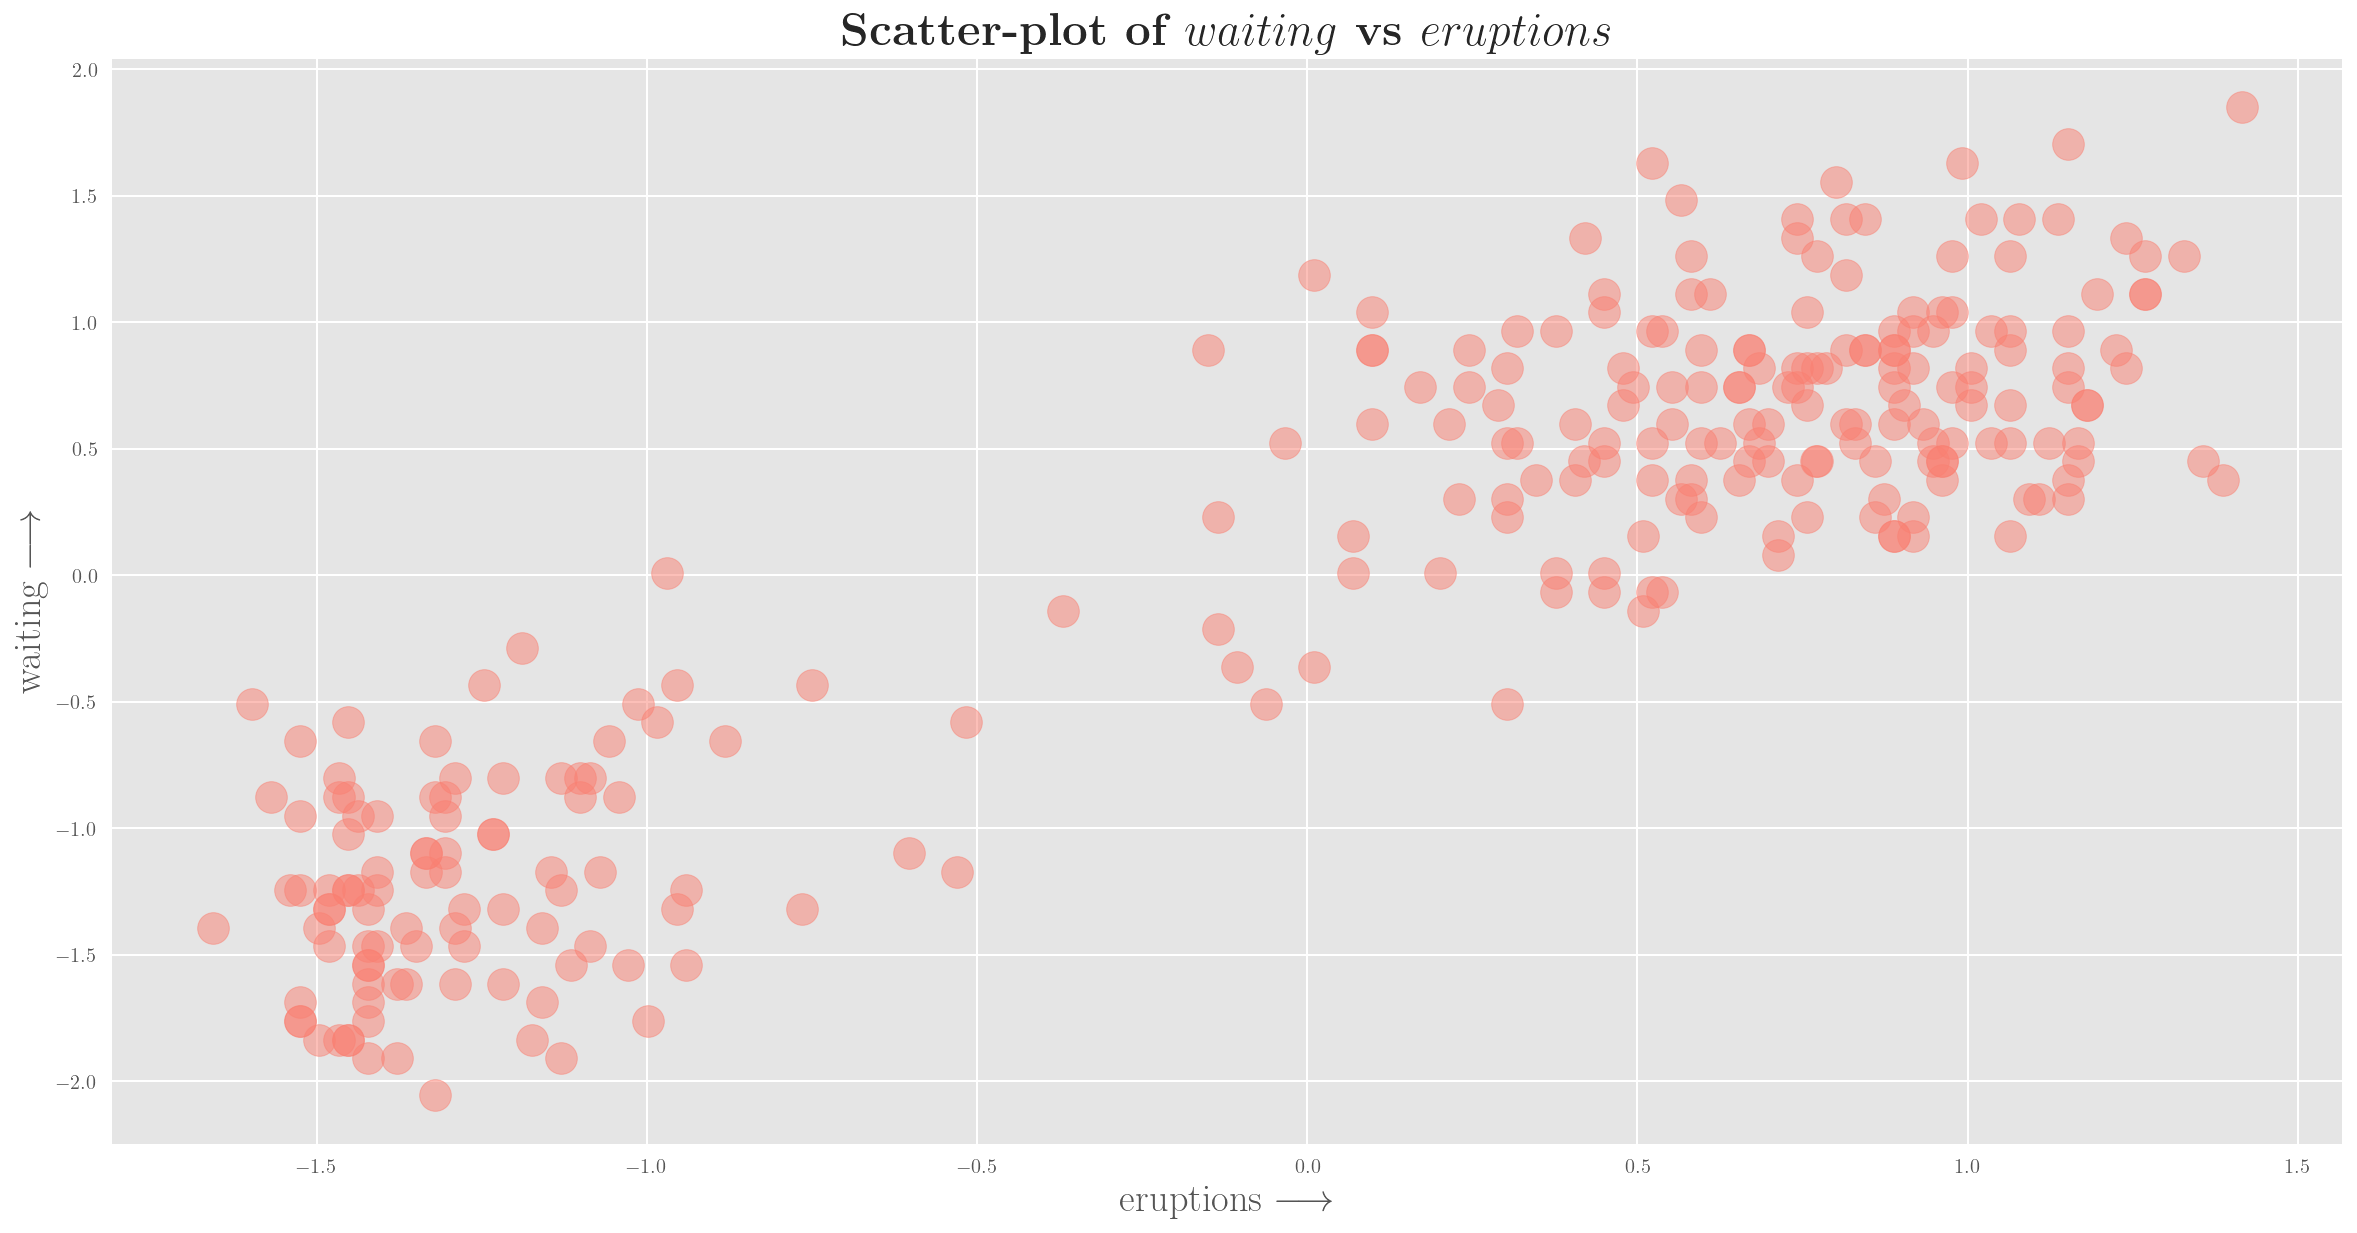

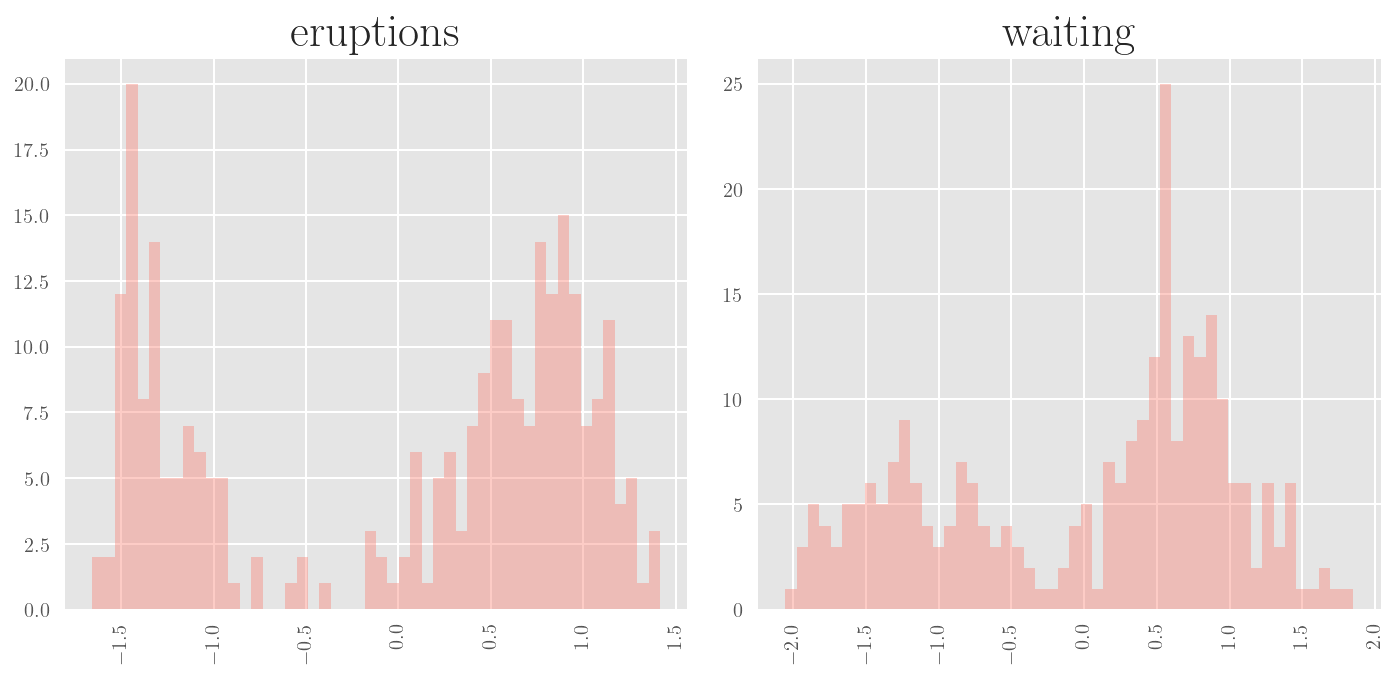

In [3]:
plt.scatter(data['eruptions'], data['waiting'], alpha=0.5, s=250, color='salmon')
plt.title(r'\textbf{Scatter-plot of $waiting$ vs $eruptions$}')
plt.xlabel(r'eruptions $\longrightarrow$');
plt.ylabel(r'waiting $\longrightarrow$');
plt.show();
data.hist(bins=50, alpha = 0.4, color='salmon', xrot=90, figsize=(10,5));
plt.tight_layout()

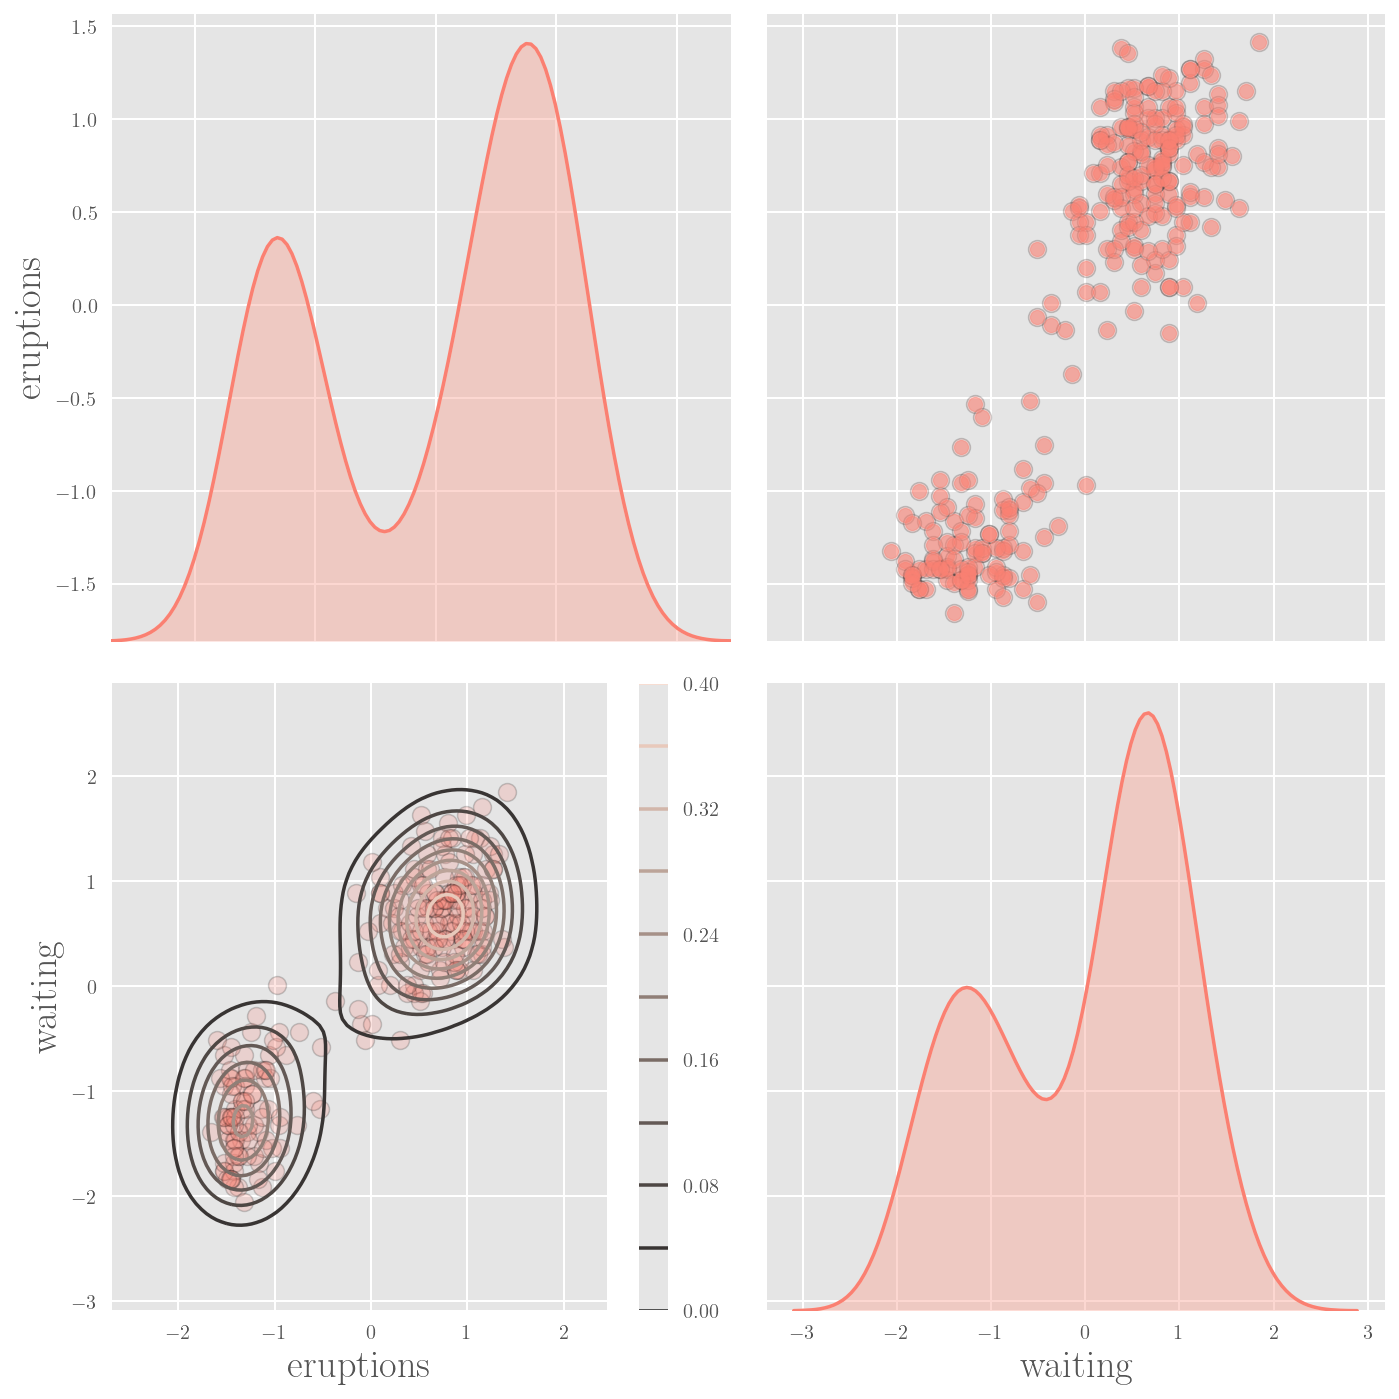

In [4]:
sns.set_palette("Reds")

sample = data
g = sns.pairplot(sample, diag_kind='kde', 
                   plot_kws = { 'alpha': 0.20, 's': 80, 'edgecolor': 'k', 'color':'salmon'}, 
                   size=5, );
g.map_diag(sns.kdeplot, color='salmon',  shade=True);
g.map_upper(plt.scatter, color='salmon', alpha=0.5);
g.map_lower(sns.kdeplot, shade=False, shade_lowest=False, cbar=True);

plt.tight_layout()

## DBSCAN

Let us now cluster this data for various values of the hyper-parameters: $\epsilon, nPts$ (the neighborhood radius, and the number of neighbors needed for a point to qualify as an interior point).

In [10]:
%run dbscan_common.ipynb

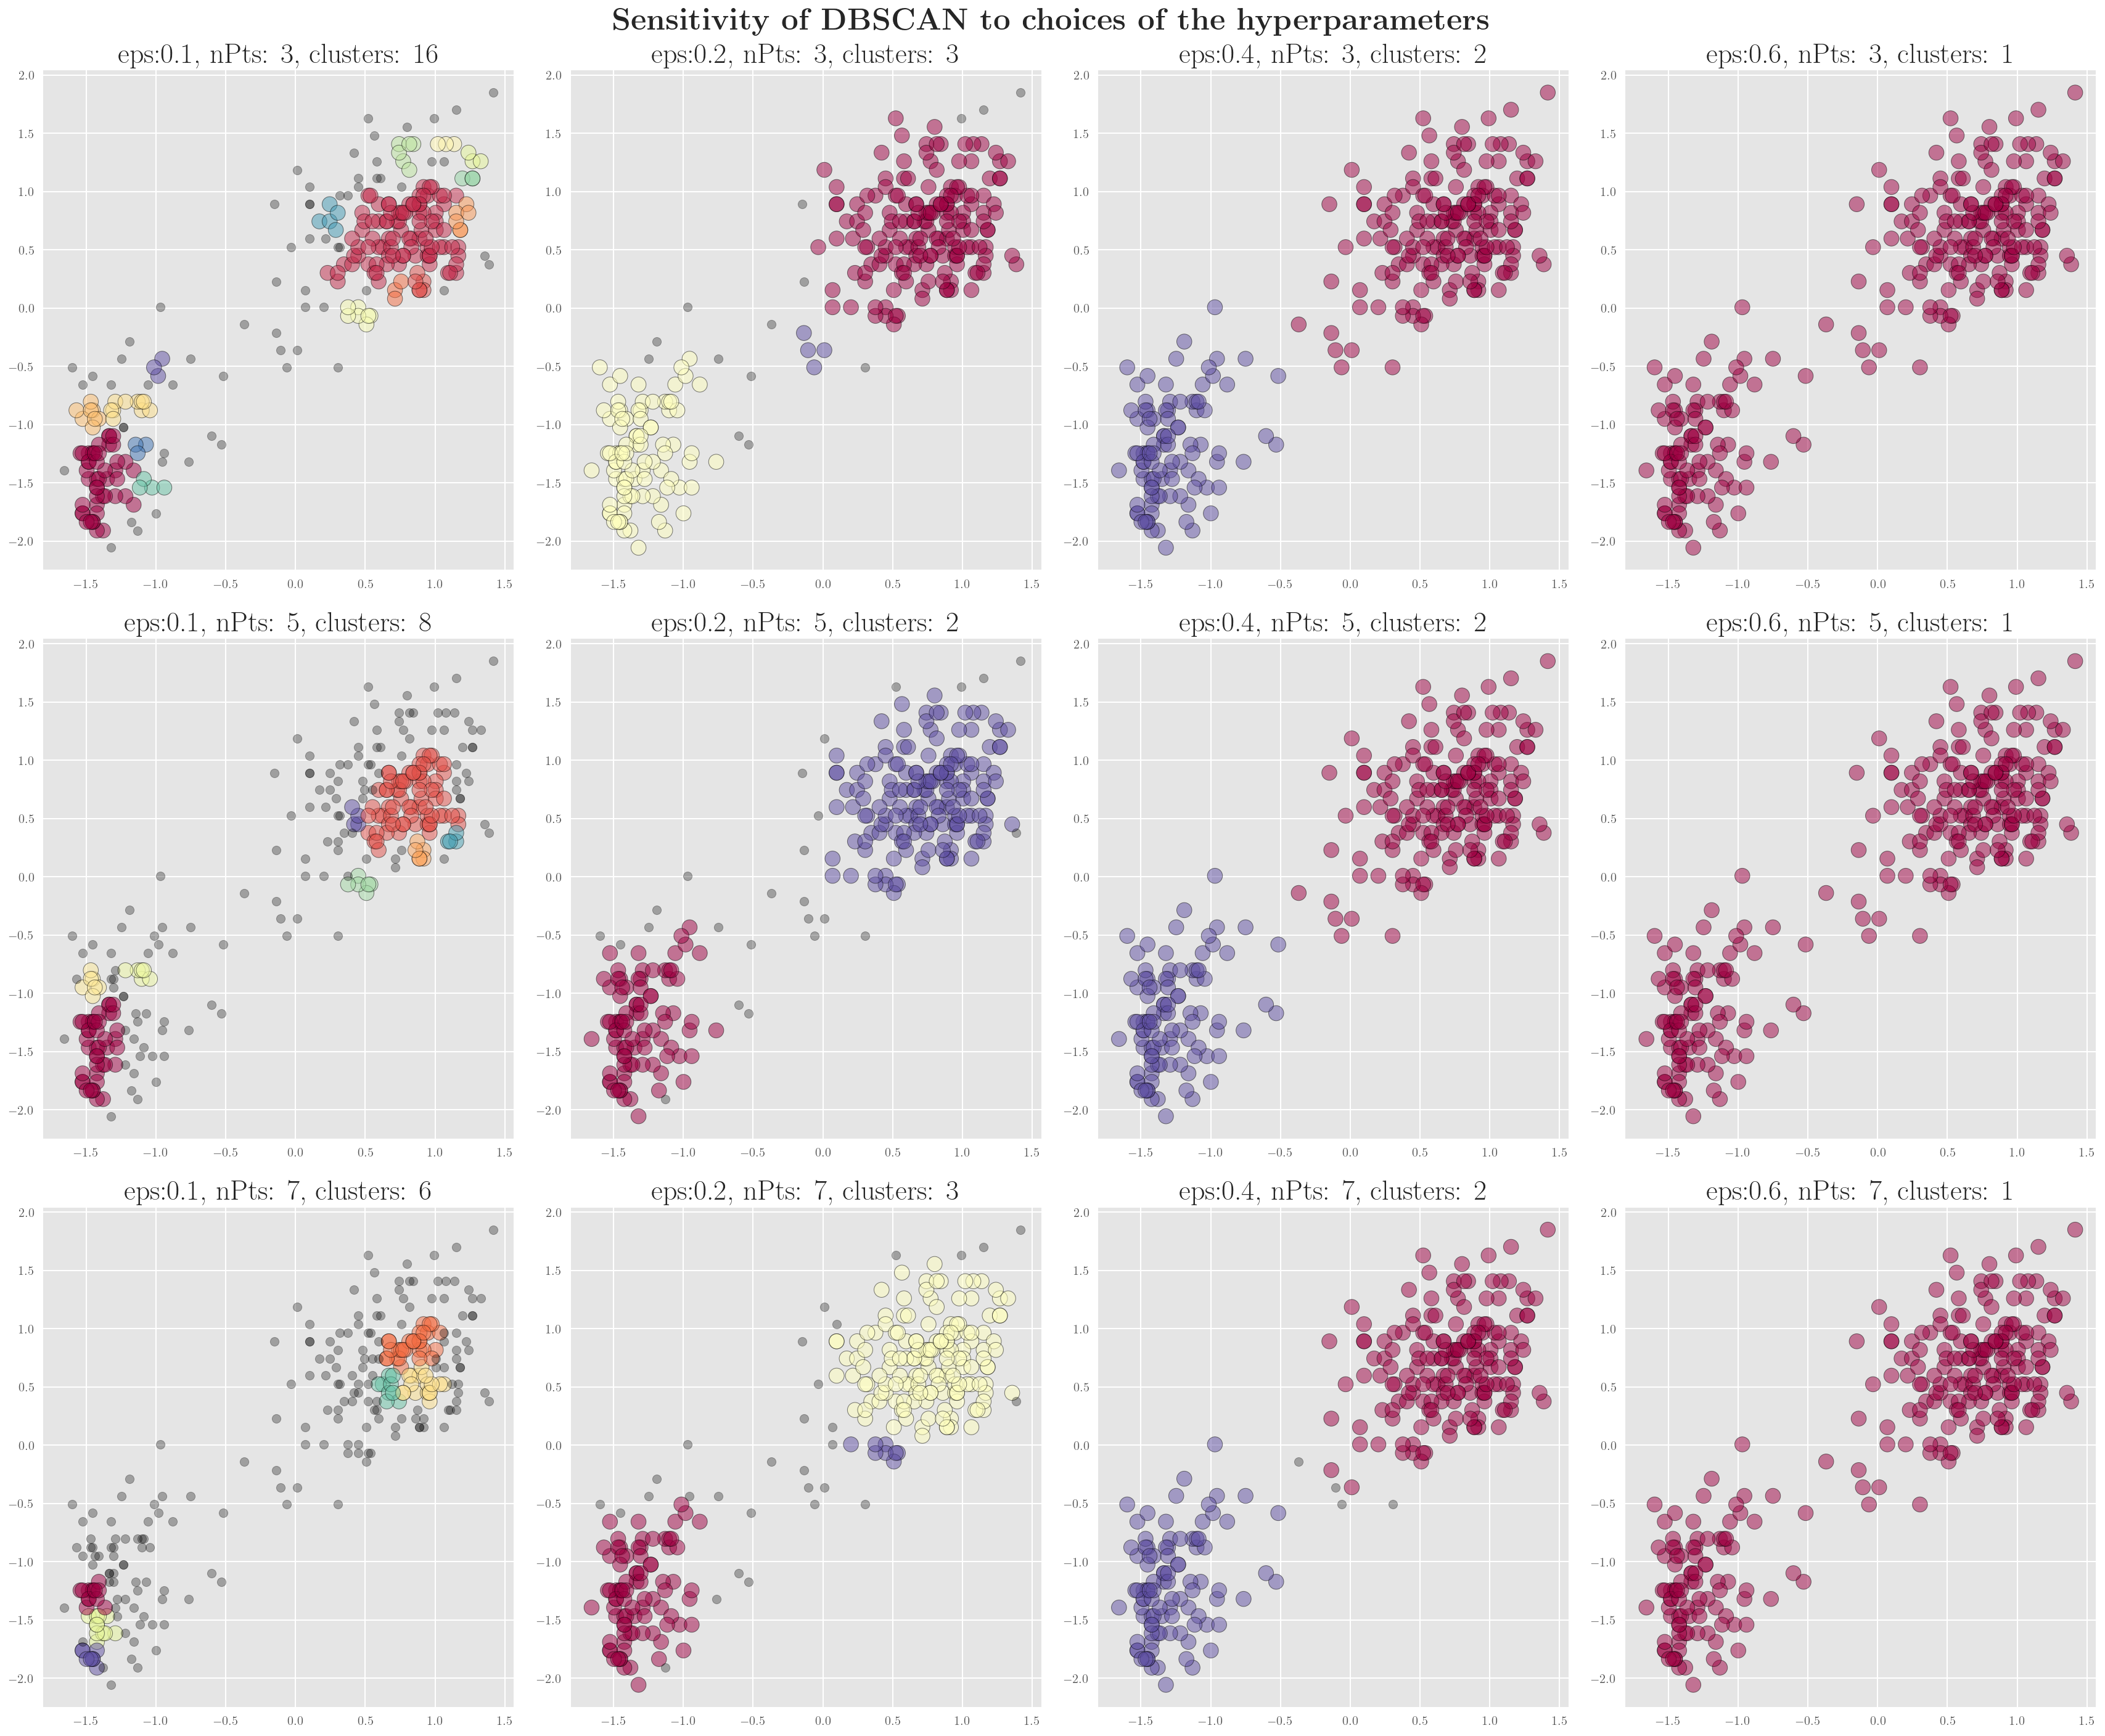

In [11]:
# Different values of the hyperparameters
epsilons = [0.1, 0.2, 0.4, 0.6]
neighbors = [3, 5, 7]

quality = dbscan_cluster(epsilons=epsilons, neighbors=neighbors, data=data)

In the above plots, the outliers are marked in grey.

We observe that the clustering is markedly different for different values of the hyperparameters. **Which of these clusters would you consider optimal?**

### Clustering quality metrics
Let us now observe the clustering quality metrics, and see how it agrees with your intuition.

In [8]:
quality.style.highlight_max(color = 'lightgreen', axis = 0, subset =['silhouette score'])

,epsilon,nPts,silhouette score
0,0.100000,3.000000,0.541765
1,0.200000,3.000000,0.629091
2,0.400000,3.000000,0.756288
3,0.600000,3.000000,0.000000
4,0.100000,5.000000,0.361648
5,0.200000,5.000000,0.659584
6,0.400000,5.000000,0.756288
7,0.600000,5.000000,0.000000
8,0.100000,7.000000,0.187751
9,0.200000,7.000000,0.532192


### Conclusion

Inspecting the clustering plots, and the silhouette score table, it is apparent that we get the best clustering for the hyperparameter values:
* $\epsilon = 0.4, nPts = 3$
* $\epsilon = 0.4, nPts = 5$


The scree-plot confirms that the optimal number of clusters is $k=2$, i.e. two clusters as we saw visually in the plot-grid of the previous section.